In [69]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Transformada de Fourier

La transformaa ocurre cuando intentamos pasar de un dominio discreto a un dominio contínuo (esto se hace suponiendo el caso de una señal aperiódica como si tuviera un periodo $T \rightarrow \infty$)



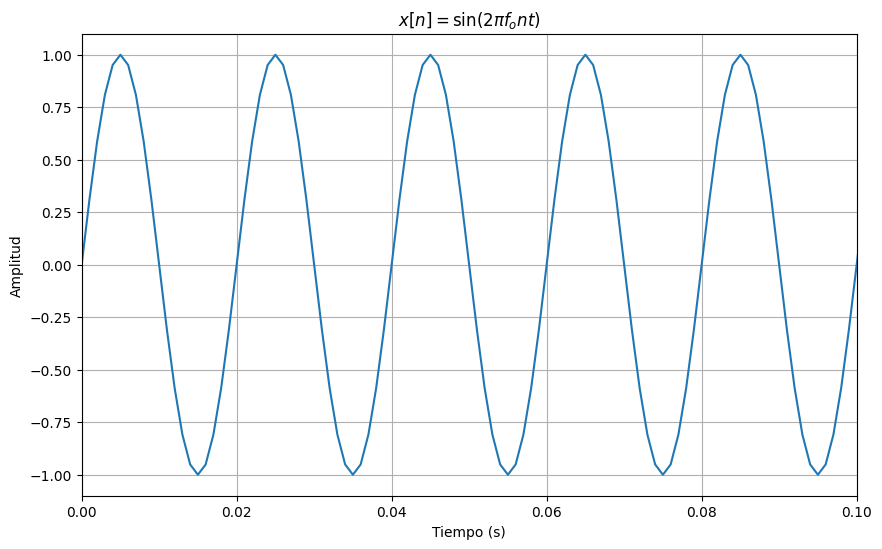

In [70]:
# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo (Hz)
f = 50  # Frecuencia de la señal (Hz)
N = 1024  # Número de muestras
t = np.arange(N) / fs

# Crear una señal sinusoidal
signal = np.sin(2 * np.pi * f * t)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title(r'$x[n] = \sin(2 \pi f_o n t)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(0, 0.1)  # Mostrar solo un intervalo de tiempo corto para visualizar mejor la forma de onda
plt.show()


In [71]:
freqs = np.fft.fftfreq(N, 1 / fs)
freqs_s = np.fft.fftshift(freqs)

# Transformada Discreta de Fourier
La DFT de una señal discreta \( x[n] \) de longitud \( N \) se define como:

$$
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi}{N}kn}, \quad k = 0, 1, \dots, N-1
$$

Donde:
- $X[k]$ : Coeficientes de la DFT (espectro de la señal).
- $x[n]$ : Señal en el dominio del tiempo.
- $N$: Número de puntos de la DFT.
- $k$: Índice de frecuencia discreta.

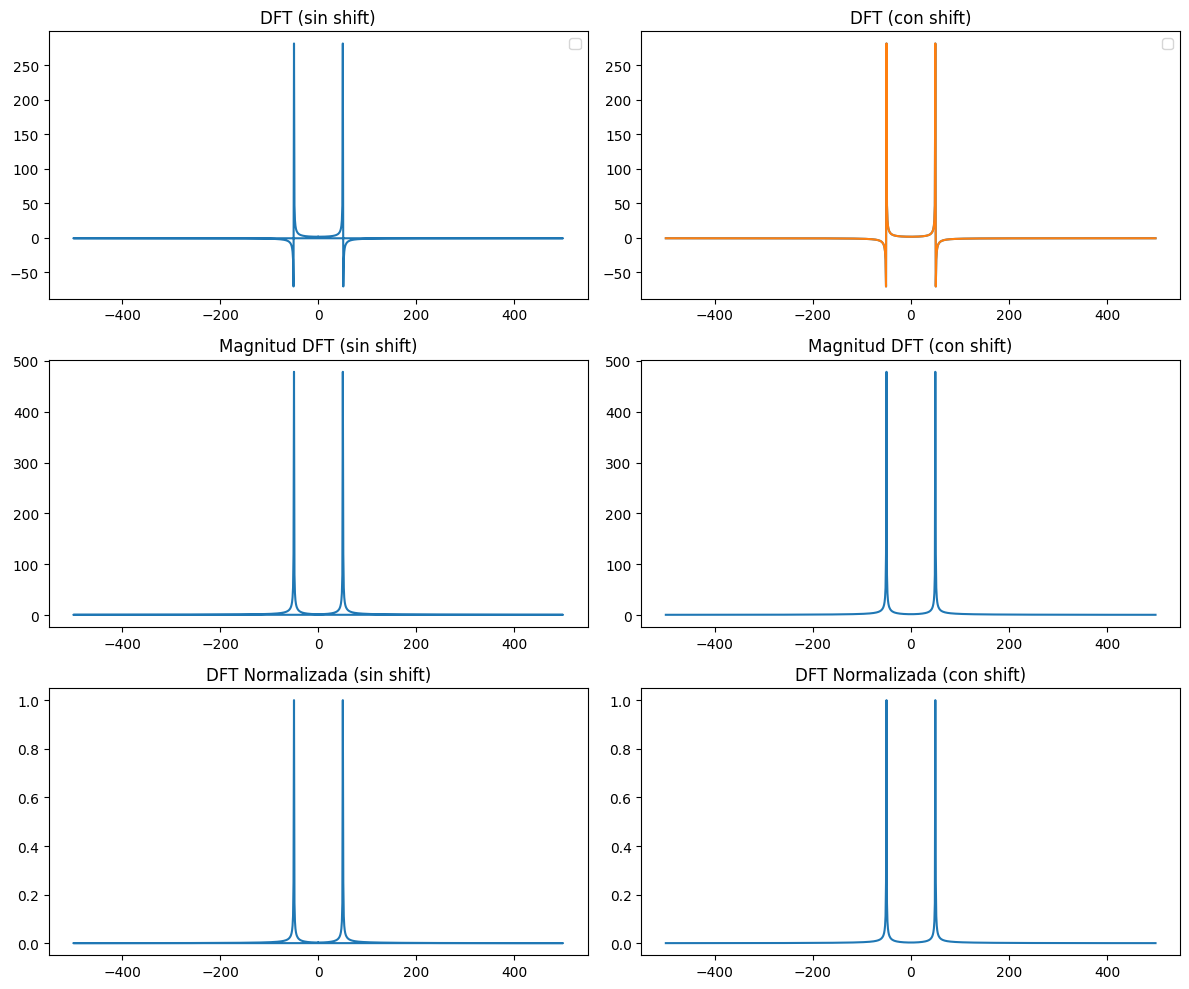

In [72]:
def dft(x):
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W @ x

# Cálculo del espectro usando FFT
dft_og = dft(signal)
dft_s = np.fft.fftshift(dft_og)

mag_dft_og = np.abs(dft_og)
mag_dft_s = np.abs(dft_s)

nor_dft_og = mag_dft_og / np.max(mag_dft_og)
nor_dft_s = mag_dft_s / np.max(mag_dft_s)

# Crear figura y ejes
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Graficar señales
axs[0, 0].plot(freqs, dft_og)
axs[0, 0].set_title("DFT (sin shift)")
axs[0, 0].legend()

axs[0, 1].plot(freqs_s, dft_s)
axs[0, 1].plot(freqs_s, dft_s)
axs[0, 1].set_title("DFT (con shift)")
axs[0, 1].legend()

axs[1, 0].plot(freqs, mag_dft_og)
axs[1, 0].set_title("Magnitud DFT (sin shift)")

axs[1, 1].plot(freqs_s, mag_dft_s)
axs[1, 1].set_title("Magnitud DFT (con shift)")

axs[2, 0].plot(freqs, nor_dft_og)
axs[2, 0].set_title("DFT Normalizada (sin shift)")

axs[2, 1].plot(freqs_s, nor_dft_s)
axs[2, 1].set_title("DFT Normalizada (con shift)")

# Ajustar diseño
plt.tight_layout()
plt.show()

# Transformada Rápida de Fourier

La Transformada Rápida de Fourier (FFT) es una técnica más eficiente para calcular la DFT de una señal discreta, ya que puede realizar la operación en tiempo lineal, en lugar de en tiempo cuadrático. La FFT se basa en el uso de la transformada de Fourier discreta, pero en lugar de utilizar la fórmula general de la DFT, se utiliza una aproximación más eficiente para calcular la DFT.

La FFT puede ser utilizada en lugar de la DFT para calcular el espectro de una señal discreta, lo que puede ser más rápido y eficiente en sistemas digitales.


DFT:

![FFT matricial expresion 1](https://upload.wikimedia.org/wikipedia/commons/6/6b/Fast_Fourier_transform.png)

Este algoritmo para calcular la DFT tiene una complejidad computacional $O (N²)$

FFT:

![FFT matricial expresion 2](https://upload.wikimedia.org/wikipedia/commons/1/1d/Imagenmatrizg7.png)

Este algoritmo tiene una complejidad computacional $O (NlogN)$ además de que se calcula por separado los índices pares de los impares de la señal


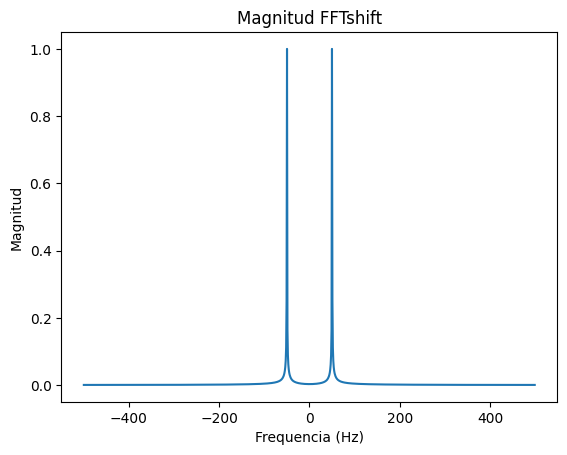

In [73]:
# De ahora en adelante solo vamos a utilizar la FFT para mayor comodidad y siempre la vamos a ordenar con fftshift.


# Cálculo del espectro usando FFT
fft_og = np.fft.fft(signal)
Xw = np.fft.fftshift(fft_og)

mag_Xw = np.abs(Xw)

mag_Xw = mag_Xw / np.max(mag_Xw)

plt.plot(freqs_s, mag_Xw)
plt.title("Magnitud FFTshift")
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitud')
plt.show()

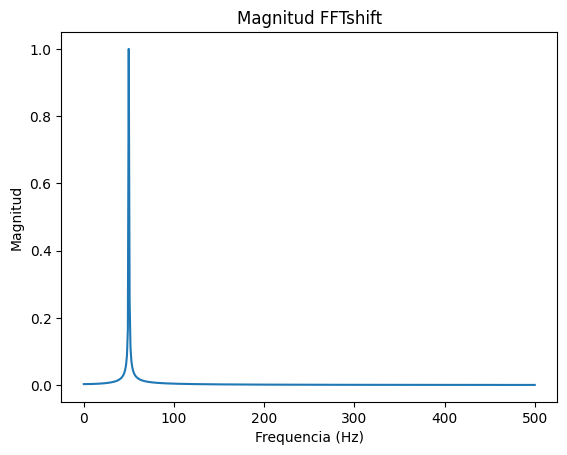

In [74]:
# Para señales reales se puede utilizar rfft para solo calcular su parte positiva (No necesario fftshift)

Xw_p = np.fft.rfft(signal)

freqs_p = np.fft.rfftfreq(N, 1/fs)

mag_Xw_p = np.abs(Xw_p) / np.max(np.abs(Xw_p))

plt.plot(freqs_p, mag_Xw_p)
plt.title("Magnitud FFTshift")
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Magnitud')
plt.show()

## Transformada Inversa

$$
x[n] = \frac{1}{N} \sum_{n=0}^{N-1} X[k] \cdot e^{j\frac{2\pi}{N}kn}, \quad n = 0, 1, \dots, N-1
$$

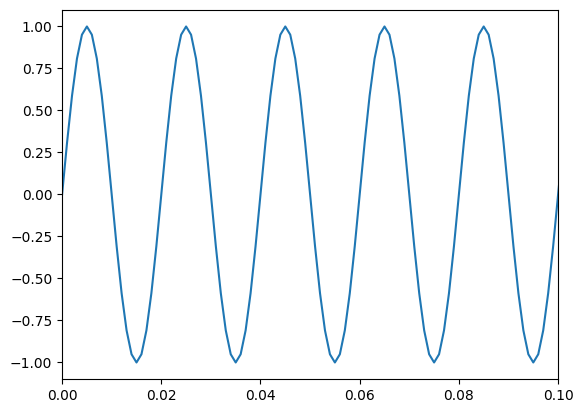

In [78]:
signal_reconstruct = np.fft.ifft(fft_og)

plt.plot(t, signal_reconstruct)
plt.xlim(0, 0.1)
plt.show()

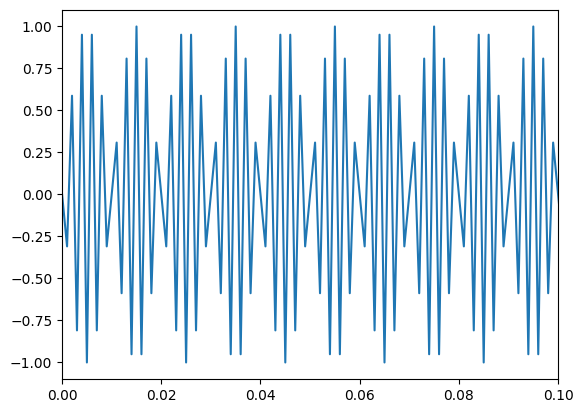

In [79]:
sig_rec_mag = np.fft.ifft(Xw)

plt.plot(t, sig_rec_mag)
plt.xlim(0, 0.1)
plt.show()

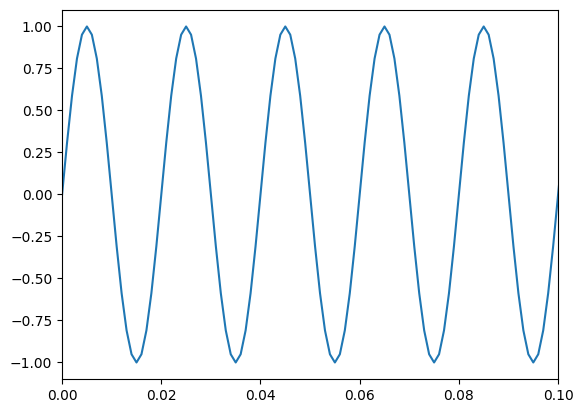

In [80]:
#Sólo con la parte positiva

sig_rec_p = np.fft.irfft(Xw_p)

plt.plot(t, sig_rec_p)
plt.xlim(0, 0.1)
plt.show()



# Ejercicio

Hacer la transformada de Fourier a las señales base vistas anteriormente. (escalón, rectangular, triangular, escalera)